## Informasi Mahasiswa 

Nama: Najla Raihana Kamila 

NPM: 2108107010067

## Jenis Dataset 

Pada tugas ini, saya menggunakan dataset https://www.kaggle.com/datasets/pushprajnamdev/diabetes-dataset yang diambil dari Kaggle. Dataset ini berisi 9 kolom dengan jumlah baris sebanyak 768 mengenai data pasien yang menderita diabetes berumur minimal 21 tahun. 9 kolom yang terdapat di dalam dataset:
1. pregnancies : Jumlah kehamilan 
2. glucose : konsentrasi glukosa dalam plasma setelah 2 jam dalam uji toleransi glukosa oral
3. bloodpressure : Tekanan darah diastolic (mm Hg)
4. skinthickness : Ketebalan lipatan kulit trisep (mm)  
5. Insulin : Insulin serum 2 jam (mu U/ml)
6. bmi : Indeks Massa Tubuh (IMT) (berat dalam kg/(tinggi dalam m)^2)
7. diabetespedigree : Fungsi diabetes pedigree
8. age : Umur (tahun)
9. outcome : Hasil diabetes atau tidak 

### Studi Kasus
Membuat model prediksi diagnosa diabetes dengan melihat dari tingkat glucose dan BMI yang dimiliki oleh pasien

## Import library yang digunakan

In [1]:
# import library yang dibutuhkan 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Gathering Data

In [2]:
# membaca dataset 
data = pd.read_csv('dataset/diabetes.csv')
data

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


## Assessing Data

In [3]:
# info tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [4]:
# melihat ukuran data
data.size

6912

In [5]:
# mengecek missing value
data.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [6]:
# mengecek duplicate data
duplicate_rows = data[data.duplicated()]

# menampilkan baris duplikasi (jika ada)
if not duplicate_rows.empty:
    print("Duplikasi data ditemukan:")
    print(duplicate_rows)
else:
    print("Tidak ada duplikasi data.")

Tidak ada duplikasi data.


In [7]:
# melihat statistik parameter 
data.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
# mengubah label ke dalam bentuk numerik
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data["outcome"]=enc.fit_transform(data["outcome"]) # 1 iya, 0 tidak

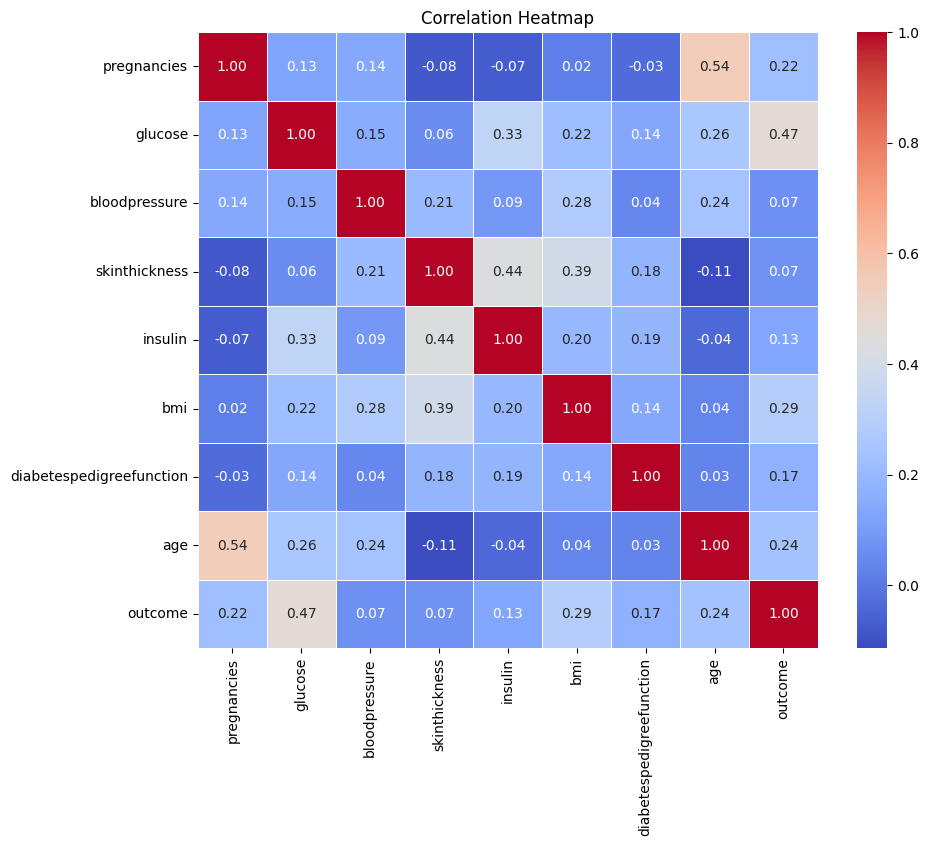

In [9]:
# melihat korelasi antar data
correlation_matrix = data.corr()

# membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Pada heatmap korelasi diatas, dapat dilihat bahwa korelasi yang paling baik atau tertinggi merupakan hubungan antara Glucose dan Outcome diikuti oleh BMI dan Outcome. 

In [10]:
# memilih kolom yang ingin dicari hubungannya
selected_columns = ['glucose', 'bmi', 'outcome']
data_subset = data[selected_columns]

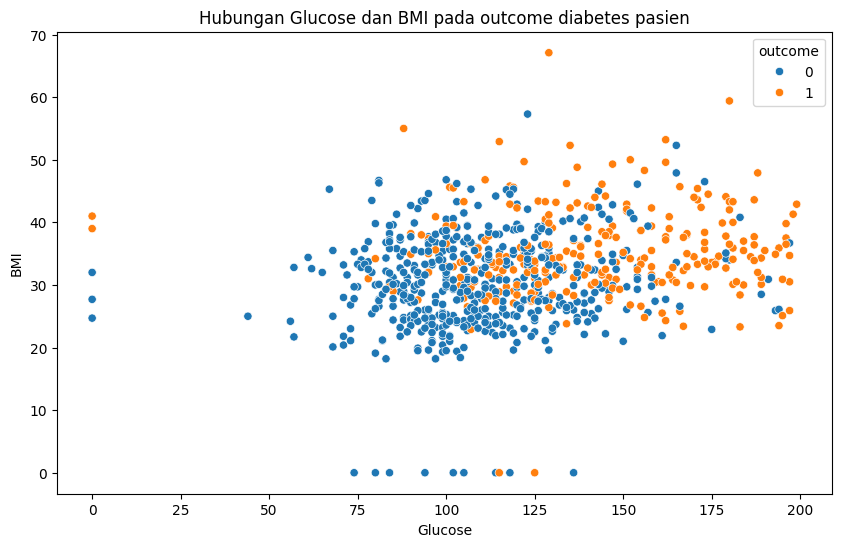

In [11]:
# memvisualisasikan hubungan menggunakan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='glucose', y='bmi', hue='outcome', data=data_subset)
plt.title('Hubungan Glucose dan BMI pada outcome diabetes pasien')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

Pada scatter plot diatas dapat dilihat bahwa kebanyakan pasien yang dicek memiliki glucose dan bmi yang tinggi memiliki peluang yang lebih besar menderita diabetes. 

## Preprocessing data

In [12]:
# memisahkan variabel independen dan variabel dependen
X = data[['glucose', 'bmi']] # independen/fitur
Y = data['outcome'] # dependen/label 

In [13]:
# melakukan skala fitur sehingga jarak antar data seragam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # menyimpan data scaler

In [14]:
# melakukan split data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Membangun Model SVM

In [15]:
# membuat dan melatih model 
svm_classifier = SVC(kernel='linear') # support vector
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
# prediksi model 
y_pred = svm_classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]


## Evaluasi Model

In [17]:
# menampilkan confusion matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[85 14]
 [21 34]]


In [18]:
# melihat akurasi model 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7727272727272727


In [19]:
# melihat classification report 
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



Diketahui bahwa model memiliki nilai akurasi yaitu 0.77 dari hasil prediksi yang telah dilakukan. 

### Kernel linear

In [20]:
# membuat model SVM linear menggunakan glucose dan bmi
svm_glucose_bmi = SVC(kernel='linear', random_state=15)
svm_glucose_bmi.fit(X_train[['glucose', 'bmi']], y_train)

SVC(kernel='linear', random_state=15)

In [21]:
# melihat classification report 
y_pred_glucose_bmi = svm_glucose_bmi.predict(X_test[['glucose', 'bmi']])
print("Classification Report:")
print(classification_report(y_test, y_pred_glucose_bmi))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



Dapat dilihat pada classification report diatas bahwa model menggunakan kernel linear dengan glucose dan bmi sebagai fitur memiliki tingkat akurasi yaitu 0.77 dari data aktual. 

### Kernel RBF

In [22]:
# membuat model svm rbf
svm_rbf = SVC(kernel='rbf', C=5.0, gamma='scale', random_state=15)
svm_rbf.fit(X_train[['glucose', 'bmi']], y_train)

SVC(C=5.0, random_state=15)

In [23]:
# melihat classification report 
y_pred_rbf = svm_rbf.predict(X_test[['glucose', 'bmi']])
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.73      0.55      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



Dapat dilihat pada classification report diatas bahwa model  menggunakan kernel rbf dengan glucose dan bmi sebagai fitur memiliki tingkat akurasi yaitu 0.77 dari data aktual. 

Hal ini menunjukkan bahwa tingkat akurasi dengan menggunakan kernel linear dan kernel rbf adalah sama.

## Visualisasi model SVM linear dan SVM RBF

c:\Users\najla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


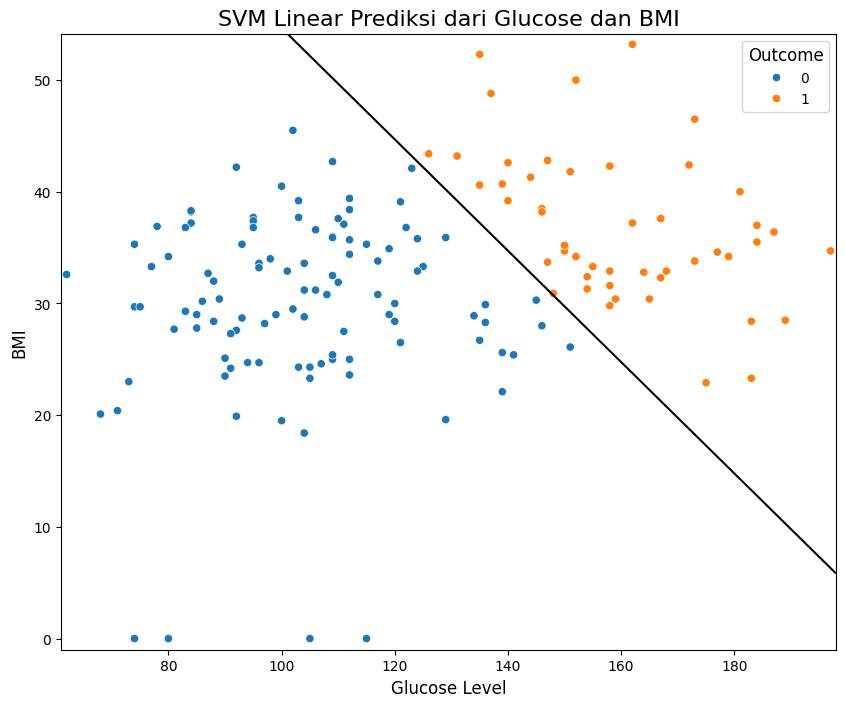

In [24]:
# visualisasi linear 
# plot untuk glucose dan bmi
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test['glucose'], y=X_test['bmi'], hue=y_pred_glucose_bmi)
plt.xlabel('Glucose Level', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.title('SVM Linear Prediksi dari Glucose dan BMI', fontsize=16)
plt.legend(title='Outcome', fontsize=10, title_fontsize='12')

# menambahkan garis decision boundary
x_min, x_max = X_test['glucose'].min() - 1, X_test['glucose'].max() + 1
y_min, y_max = X_test['bmi'].min() - 1, X_test['bmi'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
Z = svm_glucose_bmi.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', levels=[0], linewidths=1.5)

plt.show()


Dapat dilihat dari visualisasi SVM menggunakan kernel linear diatas bahwa data dapat dilakukan prediksi klasifikasi dengan hampir sempurna dengan garis decision boundary yang berhasil memisahkan antar dua kelas data. Data diatas yaitu 1 menunjukkan data diabetes sedangkan 0 menunjukkan data tidak diabetes. 

c:\Users\najla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


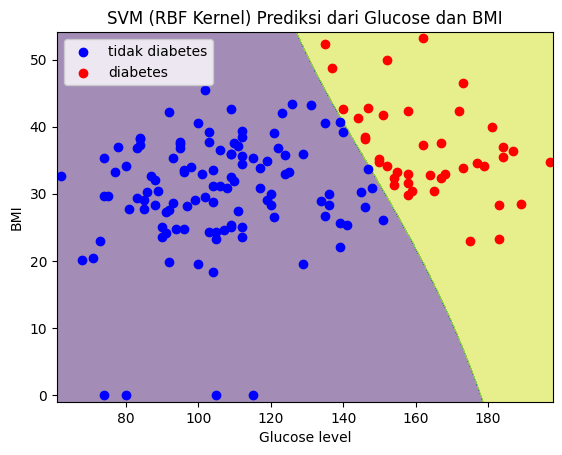

In [25]:
# Membuat meshgrid range
x_min, x_max = X_test['glucose'].min() - 1, X_test['glucose'].max() + 1
y_min, y_max = X_test['bmi'].min() - 1, X_test['bmi'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Prediksi titik pada meshgrid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Membuat kontur plot 
plt.contourf(xx, yy, Z, alpha=0.5)

# Plot scatter plot dengan label yang ditentukan
plt.scatter(X_test[y_pred_rbf == 0]['glucose'], X_test[y_pred_rbf == 0]['bmi'], c='blue', label='tidak diabetes')
plt.scatter(X_test[y_pred_rbf == 1]['glucose'], X_test[y_pred_rbf == 1]['bmi'], c='red', label='diabetes')

plt.xlabel('Glucose level')
plt.ylabel('BMI')
plt.title('SVM (RBF Kernel) Prediksi dari Glucose dan BMI')

# Menambahkan legend
plt.legend()

plt.show()